# Numerical Methods in Finance Using Python

## Chapter 0: Packages in Python

### Numpy: Linear Algebra




In [1]:
import numpy as np

### Scipy: Extension of Numpy

In [2]:
import scipy.linalg # 写法参见 https://blog.csdn.net/qq_44965314/article/details/105150761

## Chapter 1: Solving Linear Equations

$$Ax=b$$

### 1、Numpy、Scipy：np.linalg、scipy.linalg

https://scipy.github.io/devdocs/tutorial/linalg.html

**Example**，解线性方程组：

$$A=\begin{pmatrix}
1&2\\
3&5\\
\end{pmatrix},b=\begin{pmatrix}
1\\
2\\
\end{pmatrix}$$


In [3]:
a = np.array([[1, 2], [3, 5]])
b = np.array([1, 2])

# Numpy
x_np = np.linalg.solve(a, b)
print(x_np)
# Scipy
x_scipy=scipy.linalg.solve(a,b)
print(x_scipy)

print(np.allclose(np.dot(a, x_np), b)) # Check that the solution is correct
print(scipy.allclose(np.dot(a, x_np), b)) 
    # Deprecation Warning: scipy.allclose is deprecated and will be removed in SciPy 2.0.0, use numpy.allclose instead
    # 所以这两个其实是通用的

[-1.  1.]
[-1.  1.]
True
True


D:\Program_Files\Anaconda\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: scipy.allclose is deprecated and will be removed in SciPy 2.0.0, use numpy.allclose instead
  if sys.path[0] == "":


### 2、LU decomposition & factorization

The SciPy library also contains a `linalg` submodule, and there is overlap in the functionality provided by the SciPy and NumPy submodules. 

SciPy contains functions not found in `numpy.linalg`, such as functions related to **LU decomposition** and the **Schur decomposition**, multiple ways of calculating the pseudoinverse, and matrix transcendentals such as the matrix logarithm. 

Some functions that exist in both have augmented functionality in `scipy.linalg`. For example, `scipy.linalg.eig` can take a second matrix argument for solving generalized eigenvalue problems. 

Some functions in NumPy, however, have more flexible broadcasting options. For example, `numpy.linalg.solve` can handle “stacked” arrays, while `scipy.linalg.solve` accepts only a single square array as its first argument.

**Example**，LU 分解矩阵
$$A=\begin{pmatrix}
2&5&8&7\\
5&2&2&8\\
7&5&6&6\\
5&4&4&8\\
\end{pmatrix}$$


In [4]:
# Scipy
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
p, l, u = scipy.linalg.lu(A)
print(p)
print(l)
print(u)
print(np.allclose(A - p @ l @ u, np.zeros((4, 4))))

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[ 1.          0.          0.          0.        ]
 [ 0.28571429  1.          0.          0.        ]
 [ 0.71428571  0.12        1.          0.        ]
 [ 0.71428571 -0.44       -0.46153846  1.        ]]
[[ 7.          5.          6.          6.        ]
 [ 0.          3.57142857  6.28571429  5.28571429]
 [ 0.          0.         -1.04        3.08      ]
 [ 0.          0.          0.          7.46153846]]
True


The decomposition is: $A=PLU$, where $P$ is a permutation matrix (置换矩阵), $L$ lower triangular with unit diagonal elements, and $U$ upper triangular.

In [5]:
    # scipy.linalg.lu_factor: Compute pivoted LU decomposition of a matrix.
lu, piv = scipy.linalg.lu_factor(A)
piv

array([2, 2, 3, 3], dtype=int32)

**Example**，LU分解解线性方程组：
$$A=\begin{pmatrix}
2&5&8&7\\
5&2&2&8\\
7&5&6&6\\
5&4&4&8\\
\end{pmatrix},b=\begin{pmatrix}
1\\1\\1\\1\\
\end{pmatrix}
$$

In [6]:
    # scipy.linalg.lu_solve
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
b = np.array([1, 1, 1, 1])
lu, piv = scipy.linalg.lu_factor(A)
x = scipy.linalg.lu_solve((lu, piv), b)
print(x)
print(np.allclose(A @ x - b, np.zeros((4,))))

[ 0.05154639 -0.08247423  0.08247423  0.09278351]
True


In [7]:
    # 也可以这么样子写
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
b = np.array([1, 1, 1, 1])
x=scipy.linalg.lu_solve(scipy.linalg.lu_factor(A),b)
print(x)

[ 0.05154639 -0.08247423  0.08247423  0.09278351]


### 3、Cholesky decomposition & factorization

Cholesky 分解：https://zhuanlan.zhihu.com/p/112091443 ，其前提条件一般为：矩阵 A 为对称正定阵。

在 Numpy 下，Cholesky 分解式为：$A=LL^T$

In [8]:
# Numpy
A = np.array([[1,-2j],[2j,5]]);print(A) # A为复数矩阵
L = np.linalg.cholesky(A);print(L)
print(np.dot(L, L.T.conj())) # verify that L * L.H = A 
        # numpy.conj(x [，out] = ufunc'conjugate')：此函数可帮助用户对任何复数进行共轭。
    # But a matrix object is returned if A is a matrix object
print(np.linalg.cholesky(np.matrix(A)))

[[ 1.+0.j -0.-2.j]
 [ 0.+2.j  5.+0.j]]
[[1.+0.j 0.+0.j]
 [0.+2.j 1.+0.j]]
[[1.+0.j 0.-2.j]
 [0.+2.j 5.+0.j]]
[[1.+0.j 0.+0.j]
 [0.+2.j 1.+0.j]]


In [9]:
# Scipy
A = np.array([[1,-2j],[2j,5]]);print(A) # A为复数矩阵
L = scipy.linalg.cholesky(A, lower=True);print(L)
print(L @ L.T.conj()) # verify that L * L.H = A 

[[ 1.+0.j -0.-2.j]
 [ 0.+2.j  5.+0.j]]
[[1.+0.j 0.+0.j]
 [0.+2.j 1.+0.j]]
[[1.+0.j 0.-2.j]
 [0.+2.j 5.+0.j]]


In [10]:
    # scipy.linalg.cholesky_banded: Cholesky decompose a banded Hermitian positive-definite matrix: Cholesky 分解带状 Hermitian 正定矩阵
    # 俺也不懂，俺也啥都不知道：https://scipy.github.io/devdocs/reference/generated/scipy.linalg.cholesky_banded.html
Ab = np.array([[0, 0, 1j, 2, 3j], [0, -1, -2, 3, 4], [9, 8, 7, 6, 9]]);print(Ab)
A = np.diag(Ab[0,2:], k=2) + np.diag(Ab[1,1:], k=1);print(A)
A = A + A.conj().T + np.diag(Ab[2, :]);print(A)
c = scipy.linalg.cholesky_banded(Ab);print(c)
C = np.diag(c[0, 2:], k=2) + np.diag(c[1, 1:], k=1) + np.diag(c[2, :]);print(C)
print(np.allclose(C.conj().T @ C - A, np.zeros((5, 5))))

    # scipy.linalg.cho_solve_banded
Ab = np.array([[0, 0, 1j, 2, 3j], [0, -1, -2, 3, 4], [9, 8, 7, 6, 9]]);print(Ab)
A = np.diag(Ab[0,2:], k=2) + np.diag(Ab[1,1:], k=1);print(A)
A = A + A.conj().T + np.diag(Ab[2, :]);print(A)
c = scipy.linalg.cholesky_banded(Ab);print(c)
x = scipy.linalg.cho_solve_banded((c, False), np.ones(5));print(x)
print(np.allclose(A @ x - np.ones(5), np.zeros(5)))

[[ 0.+0.j  0.+0.j  0.+1.j  2.+0.j  0.+3.j]
 [ 0.+0.j -1.+0.j -2.+0.j  3.+0.j  4.+0.j]
 [ 9.+0.j  8.+0.j  7.+0.j  6.+0.j  9.+0.j]]
[[ 0.+0.j -1.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -2.+0.j  2.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  3.+0.j  0.+3.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  4.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]]
[[ 9.+0.j -1.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [-1.+0.j  8.+0.j -2.+0.j  2.+0.j  0.+0.j]
 [ 0.-1.j -2.+0.j  7.+0.j  3.+0.j  0.+3.j]
 [ 0.+0.j  2.+0.j  3.+0.j  6.+0.j  4.+0.j]
 [ 0.+0.j  0.+0.j  0.-3.j  4.+0.j  9.+0.j]]
[[ 0.        +0.j          0.        +0.j          0.        +0.33333333j
   0.71206899+0.j          0.        +1.18768515j]
 [ 0.        +0.j         -0.33333333+0.j         -0.71206899+0.03955939j
   1.38842067+0.01115197j  2.11145768-0.87334379j]
 [ 3.        +0.j          2.80871659+0.j          2.52592195+0.j
   1.88815291+0.j          1.53896753+0.j        ]]
[[ 3.        +0.j         -0.33333333+0.j          0.        +0.333333

In [11]:
    # scipy.linalg.cho_factor:Compute the Cholesky decomposition of a matrix, to use in cho_solve
A = np.array([[9, 3, 1, 5], [3, 7, 5, 1], [1, 5, 9, 2], [5, 1, 2, 6]]);print(A)
c, low = scipy.linalg.cho_factor(A)
print(c) 
    # The returned matrix also contains random data in the entries not used by the Cholesky decomposition. 
    # If you need to zero these entries, use the function cholesky instead.
print(low)
print(np.allclose(np.triu(c).T @ np. triu(c) - A, np.zeros((4, 4))))

[[9 3 1 5]
 [3 7 5 1]
 [1 5 9 2]
 [5 1 2 6]]
[[ 3.          1.          0.33333333  1.66666667]
 [ 3.          2.44948974  1.90515869 -0.27216553]
 [ 1.          5.          2.29330749  0.8559528 ]
 [ 5.          1.          2.          1.55418563]]
False
True


In [12]:
    # scipy.linalg.cho_solve
A = np.array([[9, 3, 1, 5], [3, 7, 5, 1], [1, 5, 9, 2], [5, 1, 2, 6]])
c, low = scipy.linalg.cho_factor(A)
x = scipy.linalg.cho_solve((c, low), [1, 1, 1, 1]) # 同上，可写成 x=scipy.linalg.cho_solve(scipy.linalg.cho_factor(A),b)
print(x)
print(np.allclose(A @ x - [1, 1, 1, 1], np.zeros(4)))

[-0.01749271  0.11953353  0.01166181  0.1574344 ]
True


## Chapter 2: Iteration

### 1、Jacobi Iteration

### 2、Gauss-Seidel Iteration

### 3、Fixed Point Iteration：不动点迭代法

## Chapter 3: Interpolation

https://scipy.github.io/devdocs/tutorial/interpolate.html

In [13]:
import scipy.interpolate

### 1、Lagrange Interpolation

Interpolate $f(x)=x^3$ by 3 points.



In [14]:
x = np.array([0, 1, 2]);print(x)
y = x**3;print(y)
poly = scipy.interpolate.lagrange(x, y)
print(poly)

[0 1 2]
[0 1 8]
   2
3 x - 2 x


实际上，Lagrange 插值式为：

$$L_2(x)=1*\frac{x(x-2)}{-1}+8*\frac{x(x-1)}{2}=x(-2+3x)$$

验证一下：（与上面的`print(poly)`相对应）

In [15]:
from numpy.polynomial.polynomial import Polynomial
Polynomial(poly.coef[::-1]).coef

array([ 0., -2.,  3.])

画个图：

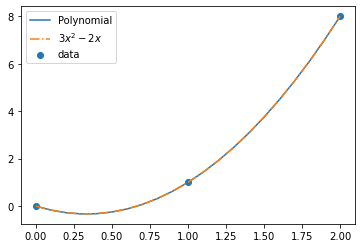

In [16]:
import matplotlib.pyplot as plt
x_new = np.arange(0, 2.1, 0.1)
plt.scatter(x, y, label='data')
plt.plot(x_new, Polynomial(poly.coef[::-1])(x_new), label='Polynomial')
plt.plot(x_new, 3*x_new**2 - 2*x_new + 0*x_new,label=r"$3 x^2 - 2 x$", linestyle='-.')
plt.legend()
plt.show()

#### Homework: Draw rate curve

In [17]:
# 非常明显的不符合常理
# 这方法不是很稳定，所有输入的数据点最好不要超过20个
x=[0,0.08,0.17,0.25,0.5,0.75,1,2,3,5,7,10,15,20,30,40,50]
y=[1.3284,1.5453,1.6192,1.871,1.89,1.8918,1.9633,2.3114,2.4078,2.5894,2.8425,2.826,3.1341,3.174,3.2954,3.3593,3.395]
poly = scipy.interpolate.lagrange(x, y)
# print(poly)

In [18]:
from numpy.polynomial.polynomial import Polynomial
Polynomial(poly.coef[::-1]).coef

array([ 1.32840000e+00,  9.35031193e+00, -1.46838429e+02,  1.04050994e+03,
       -3.49182685e+03,  6.26799795e+03, -6.46654725e+03,  3.99751012e+03,
       -1.52551076e+03,  3.67354111e+02, -5.66471009e+01,  5.62725130e+00,
       -3.58389873e-01,  1.43457292e-02, -3.44886520e-04,  4.50681725e-06,
       -2.44201226e-08])

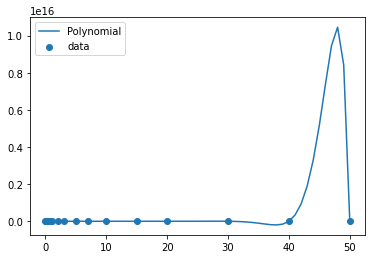

In [19]:
import matplotlib.pyplot as plt
x_new = np.arange(0, 51, 1)
plt.scatter(x, y, label='data')
plt.plot(x_new, Polynomial(poly.coef[::-1])(x_new), label='Polynomial')
plt.legend()
plt.show()

### 2、Newton Interpolation

### 3、(Cubic) Spline Interpolation

Scipy 关于样条插值部分有一篇讲义：https://scipy.github.io/devdocs/tutorial/interpolate.html

但是这篇讲义并不全，又或者说，特别专业到现在有点懵。

Scipy API Reference: https://scipy.github.io/devdocs/reference/interpolate.html

其中一些教程：https://zhuanlan.zhihu.com/p/136700122

**Example**，假设对于函数 $y=\sin x$ 做 Cubic Spline 插值

<class 'tuple'>


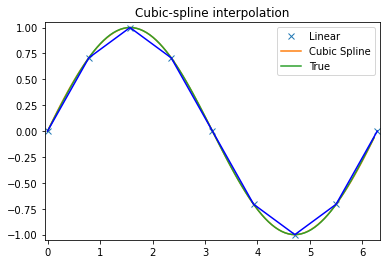

In [20]:
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8); # 0到9pi/4,相隔pi/8
y = np.sin(x)
tck = scipy.interpolate.splrep(x, y, s=0);print(type(tck))
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = scipy.interpolate.splev(xnew, tck, der=0)
plt.figure()
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')
plt.show()

Once the spline representation of the data has been determined, functions are available for evaluating the spline (`splev`) and its derivatives (`splev`, `spalde`) at any point and the integral of the spline between any two points (`splint`).

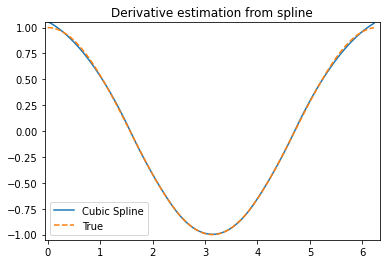

In [21]:
# Derivative of spline
yder = scipy.interpolate.splev(xnew, tck, der=1)
plt.figure()
plt.plot(xnew, yder, xnew, np.cos(xnew),'--') # y=sin(x) → y'=cos(x)
plt.legend(['Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Derivative estimation from spline')
plt.show()

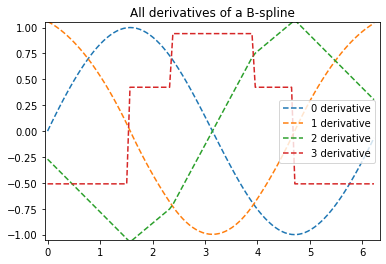

In [22]:
# All derivatives of spline
yders = scipy.interpolate.spalde(xnew, tck)
plt.figure()
for i in range(len(yders[0])):
    plt.plot(xnew, [d[i] for d in yders], '--', label=f"{i} derivative") 
plt.legend()
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('All derivatives of a B-spline')
plt.show()

In [23]:
# Integral of spline
def integ(x, tck, constant=-1):
    x = np.atleast_1d(x)
    out = np.zeros(x.shape, dtype=x.dtype)
    for n in range(len(out)):
        out[n] = scipy.interpolate.splint(0, x[n], tck)
    out += constant
    return out

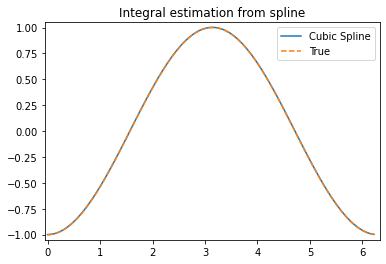

In [24]:
yint = integ(xnew, tck)
plt.figure()
plt.plot(xnew, yint, xnew, -np.cos(xnew), '--')
plt.legend(['Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Integral estimation from spline')
plt.show()

In [25]:
# Roots of spline
scipy.interpolate.sproot(tck)

array([3.14159265])

Notice that sproot may fail to find an obvious solution at the edge of the approximation interval, $x=0$. If we define the spline on a slightly larger interval, we recover both roots $x=0$ and $x=2\pi$ :

In [26]:
x = np.linspace(-np.pi/4, 2.*np.pi + np.pi/4, 21)
y = np.sin(x)
tck = scipy.interpolate.splrep(x, y, s=0)
scipy.interpolate.sproot(tck)

array([0.        , 3.14159265, 6.28318531])

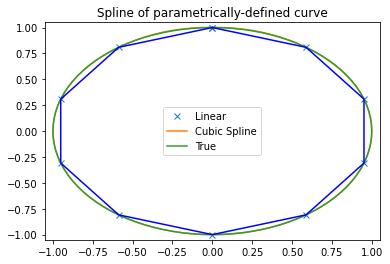

In [27]:
# Parametric spline 插值样条曲线
t = np.arange(0, 1.1, .1)
x = np.sin(2*np.pi*t)
y = np.cos(2*np.pi*t)
tck, u = scipy.interpolate.splprep([x, y], s=0)
unew = np.arange(0, 1.01, 0.01)
out = scipy.interpolate.splev(unew, tck)
plt.figure()
plt.plot(x, y, 'x', out[0], out[1], np.sin(2*np.pi*unew), np.cos(2*np.pi*unew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-1.05, 1.05, -1.05, 1.05])
plt.title('Spline of parametrically-defined curve')
plt.show()

In [28]:
x=np.array([-1,0,1,2])
y=np.array([-1,0,1,0])
xx=np.array([-0.8,-0.3,0.2,0.7,1.2,1.7])
ynew = scipy.interpolate.splev(xx, scipy.interpolate.splrep(x, y, k=3), der=0)
print(ynew)

[-0.896 -0.391  0.264  0.819  1.024  0.629]


In [29]:
# 验证《数值计算方法（MATLAB版）》Chapter 5.6 Example 5.11：scipy.interpolate.CubicSpline
    # https://scipy.github.io/devdocs/reference/generated/scipy.interpolate.CubicSpline.html
x=np.array([-1,0,1,2])
y=np.array([-1,0,1,0])
xx=np.array([-0.8,-0.3,0.2,0.7,1.2,1.7])
ynew = scipy.interpolate.CubicSpline(x, y, bc_type=((1, 0), (1, -1)))
print(ynew(xx))

[-0.94506667 -0.4414      0.30453333  0.9002      0.91093333  0.3546    ]


### Practice：利率期限结构

<class 'tuple'>


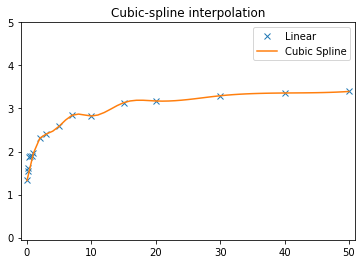

In [30]:
# Homework: rate curves 1
x=[0,0.08,0.17,0.25,0.5,0.75,1,2,3,5,7,10,15,20,30,40,50]
y=[1.3284,1.5453,1.6192,1.871,1.89,1.8918,1.9633,2.3114,2.4078,2.5894,2.8425,2.826,3.1341,3.174,3.2954,3.3593,3.395]
tck = scipy.interpolate.splrep(x, y, s=0);print(type(tck))
xnew = np.arange(0,51,1)
ynew = scipy.interpolate.splev(xnew, tck, der=0)
plt.figure()
plt.plot(x, y, 'x', xnew,ynew)
plt.legend(['Linear', 'Cubic Spline'])
plt.axis([-1, 51, -0.05, 5])
plt.title('Cubic-spline interpolation')
plt.show()

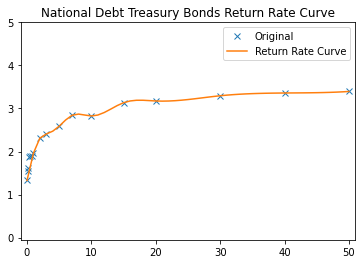

In [31]:
# Homework: rate curves 2
x=[0,0.08,0.17,0.25,0.5,0.75,1,2,3,5,7,10,15,20,30,40,50]
y=[1.3284,1.5453,1.6192,1.871,1.89,1.8918,1.9633,2.3114,2.4078,2.5894,2.8425,2.826,3.1341,3.174,3.2954,3.3593,3.395]
    # Data：https://yield.chinabond.com.cn/cbweb-mn/yield_main
    # Date：2022-04-26
xnew = np.arange(0,51,1)
ynew = scipy.interpolate.CubicSpline(x, y)
    # print(ynew(xnew))
plt.figure()
plt.plot(x, y, 'x', xnew,ynew(xnew))
plt.legend(['Original', 'Return Rate Curve'])
plt.axis([-1, 51, -0.05, 5]) # 与实际画出来的线有出入：plt.axis([-1, 1, -0.05, 5])
plt.title('National Debt Treasury Bonds Return Rate Curve')
plt.savefig(fname='Cubic-Spline-Interpolation-Rate.svg',format='svg')
plt.show()

#### 利率期限结构拟合：插值方法

线性插值、Lagrange插值、Hermite插值

实际上，我国业界公布的利率期限结构，包括财政部国库司，其**来自中央国债登记结算有限责任公司提供的收益率曲线**，他们通常采用插值方法拟合利率期限结构。

MATLAB: `Yl=interp1(X,Y,XL,'linear');` 、`YL=interp1(X,Y,XL,'spline');`、`YH=interp1(X,Y,XL,'pchip');`
https://ww2.mathworks.cn/help/matlab/ref/interp1.html

linear
nearest


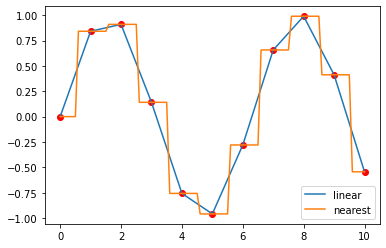

In [32]:
import numpy as np
import scipy.interpolate
import pylab

x=np.linspace(0,10,11)
y=np.sin(x)

xnew=np.linspace(0,10,101)

pylab.plot(x,y,'ro')
list1=['linear','nearest']
for kind in list1:
    print(kind)
    f=scipy.interpolate.interp1d(x,y,kind=kind)
    #f是一个函数，用这个函数就可以找插值点的函数值了：
    ynew=f(xnew)
    pylab.plot(xnew,ynew,label=kind)

pylab.legend(loc='lower right')
pylab.show()

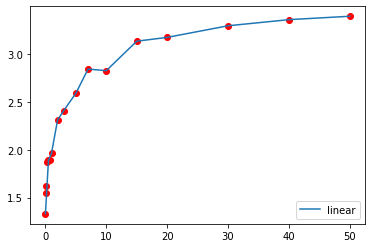

In [33]:
# 线性插值
import pylab
    # Matplotlib pylab模块
    # PyLab 是 Matplotlib 面向对象绘图库的过程接口。Matplotlib 是整个包; matplotlib.pyplot是 Matplotlib中的一个模块; 它和 PyLab 是一个与 Matplotlib 一起安装的模块。
    # 现在来说我们经常使用pyplot，因为pyplot相比pylab更加纯粹。
x=[0,0.08,0.17,0.25,0.5,0.75,1,2,3,5,7,10,15,20,30,40,50]
y=[1.3284,1.5453,1.6192,1.871,1.89,1.8918,1.9633,2.3114,2.4078,2.5894,2.8425,2.826,3.1341,3.174,3.2954,3.3593,3.395]
    # Data：https://yield.chinabond.com.cn/cbweb-mn/yield_main
    # Date：2022-04-26
pylab.plot(x,y,'ro')
xnew=np.linspace(0,50,101)
f=scipy.interpolate.interp1d(x,y,kind='linear')
ynew=f(xnew)
pylab.plot(xnew,ynew,label='linear')
pylab.legend(loc='lower right') # Legend图例
pylab.show()

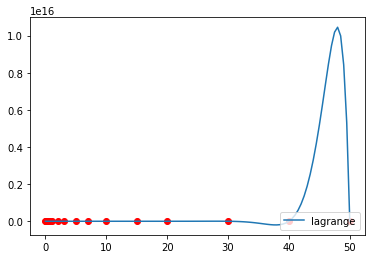

In [34]:
# Lagrange 插值
pylab.plot(x,y,'ro')
f=scipy.interpolate.lagrange(x,y)
ynew=f(xnew)
pylab.plot(xnew,ynew,label='lagrange')
pylab.legend(loc='lower right')
pylab.show()

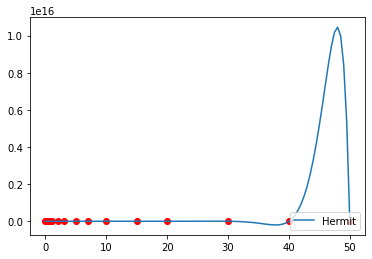

In [35]:
# Hermit 插值
pylab.plot(x,y,'ro')
g=scipy.interpolate.KroghInterpolator(x,y)
pylab.plot(xnew,g(xnew),label='Hermit')
pylab.legend(loc='lower right')
pylab.show()

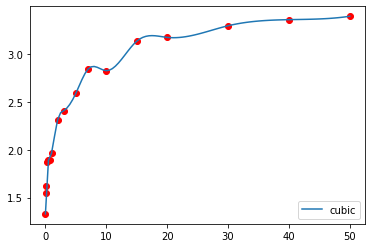

In [36]:
# cubic 三次样条插值
pylab.plot(x,y,'ro')
f=scipy.interpolate.interp1d(x,y,kind='cubic')
ynew=f(xnew)
pylab.plot(xnew,ynew,label='cubic')
pylab.legend(loc='lower right')
pylab.show()

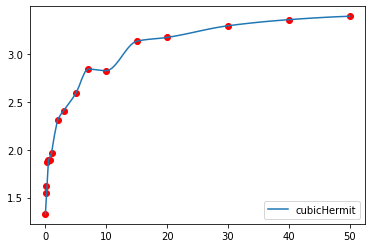

In [37]:
# pchip_interpolate插值
pylab.plot(x,y,'ro')
f=scipy.interpolate.pchip_interpolate(x,y,xnew)
pylab.plot(xnew,f,label='cubicHermit')
pylab.legend(loc='lower right')
pylab.show()

## Chapter 4: Numeral Integration

https://scipy.github.io/devdocs/tutorial/integrate.html

In [38]:
import math
import numpy as np
import scipy.integrate

**Example**，求积分

$$\int_{1}^{2}2x dx =3$$

In [39]:
# 一重积分
# 基本使用格式：integrate(func, a, b)
# func是一个函数名，a是积分下限，b是积分上限
# 值得注意的是，使用该积分函数，需要将被积表达式封装在函数内，比如被积表达式是2*x，积分上下限分别为 1和2，口算可得积分结果为3
    # 1
def func(x):
    return 2*x  # 值得注意的是，一定要将表达式return出来

scipy.integrate.quad(func, 1, 2)   # 出结果 3

(3.0, 3.3306690738754696e-14)

In [40]:
    # 2
scipy.integrate.quad(lambda x : 2*x, 1, 2)

(3.0, 3.3306690738754696e-14)

**Example**，求积分

$$\int_{0}^{1} (ax^2+b) dx =\frac{a}{3}+b$$

In [41]:
def integrand(x, a, b):
    return a*x**2 + b
a = 2;b = 1
scipy.integrate.quad(integrand, 0, 1, args=(a,b))

(1.6666666666666667, 1.8503717077085944e-14)

**Example**，求积分

$$\int_{0}^{1} e^{-x^2} dx$$

这个积分就很难直接求解析解了，数值方法计算可能更方便一些

In [42]:
    # 2 Another Example
f= lambda x:np.exp(-x**2)
scipy.integrate.quad(f, 0, 1)

(0.7468241328124271, 8.291413475940725e-15)

In [43]:
# 二重积分
# dblquad的一般形式是scipy.integrate.dblquad(func，a，b，gfun，hfun)
# 其中，func是要积分函数的名称，'a'和'b'分别是x变量的下限和上限，而gfun和hfun是定义变量y的下限和上限的函数名称

**Example**，求积分:

![](http://www.yiibai.com/uploads/images/201803/0503/652160349_12005.png)

In [44]:
f = lambda x, y : 16*x*y
g = lambda x : 0
h = lambda y : math.sqrt(1-4*y**2)
scipy.integrate.dblquad(f, 0, 0.5, g, h)

(0.5, 1.7092350012594845e-14)

### 1、Newton-Cotes Formula

`scipy.integrate.newton_cotes(rn, equal=0)` : https://scipy.github.io/devdocs/reference/generated/scipy.integrate.newton_cotes.html

#### Integrating using Samples.

`scipy.integrate.simpson` : https://scipy.github.io/devdocs/reference/generated/scipy.integrate.simpson.html

In case of arbitrary spaced samples, the two functions `trapezoid` and `simpson` are available. They are using **Newton-Coates formulas** of order 1 and 2 respectively to perform integration. The trapezoidal rule approximates the function as a straight line between adjacent points, while Simpson’s rule approximates the function between **three** adjacent points as a parabola.

For an odd number of samples that are equally spaced **Simpson’s rule** is exact if the function is a polynomial of order 3 or less. If the samples are not equally spaced, then the result is exact only if the function is a polynomial of order 2 or less.

In [45]:
def f1(x):
    return x**2
def f2(x):
    return x**3
x = np.array([1,3,4]);y1 = f1(x)
scipy.integrate.simpson(y1, x)

21.0

结果与 $\int_1^4 x^2 dx =21$ 相同。

In [46]:
y2 = f2(x)
scipy.integrate.simpson(y2, x)

61.5

而这个结果与 $\int_1^4 x^3 dx =63.5$ 并不相同。

In [47]:
# Example: 验证《数值计算方法（MATLAB版）》Chapter 6.2 Example 6.5
f= lambda x:4/(1+x**2)
scipy.integrate.quad(f,0,1) # 精确值

(3.1415926535897936, 3.4878684980086326e-14)

In [48]:
def f(x):
    return 4/(1+x**2)
a = 0 ; b = 1
exact = np.pi # 实际上这个积分的值为 \pi
for N in np.arange(1,11,1):
    x = np.linspace(a, b, N + 1)
    an, B = scipy.integrate.newton_cotes(N, 1)
    dx = (b - a) / N
    quad = dx * np.sum(an * f(x))
    error = abs(quad - exact)
    print('{:2d}  {:10.9f}  {:.5e}'.format(N, quad, error))

# 其中 1 为梯形公式计算得到的结果，2 为辛普森公式计算得到的结果
# 而观察结果可以发现，N=8 时得到最小的error，这也证明课本上的一句话：
    # 当 n≥8 时，Cotes系数有正有负，此时相应的求积公式的稳定性得不到保证，故在实际计算中不宜采用高阶的 Newton-Cotes Formula。

 1  3.000000000  1.41593e-01
 2  3.133333333  8.25932e-03
 3  3.138461538  3.13112e-03
 4  3.142117647  5.24993e-04
 5  3.141878418  2.85764e-04
 6  3.141570856  2.17979e-05
 7  3.141579303  1.33510e-05
 8  3.141592674  2.02846e-08
 9  3.141592696  4.26037e-08
10  3.141592750  9.63215e-08


In [49]:
# Example: 验证《数值计算方法（MATLAB版）》Chapter 6.2 Example 6.5
# Wolfram Alpha：`simpson's rule f(x)=4/(1+x^2) from 0 to 1`
def f(x):
    return 4/(1+x**2)
x=np.array([0,0.5,1]);y=f(x) 
    # x=np.linspace(0,1,3) # =[0,0.5,1],同样效果
    # x=np.arange(0,1.01,0.05) 分割成20个，随着分割次数增大，计算值也逐渐逼近，见后面
scipy.integrate.simpson(y,x) # 课本所提到的辛普森公式

3.1333333333333333

In [50]:
x=np.array([0,1]);y=f(x)
scipy.integrate.trapezoid(y,x) # 课本所提到的梯形公式

3.0

### 2、Composite Formula

In [51]:
    # Composite Trapezoid formula: Integrate along the given axis using the composite trapezoidal rule.
    # Example: 验证《数值计算方法（MATLAB版）》Chapter 6.3 Example 6.9
x=np.linspace(0,1,21);y=f(x)
scipy.integrate.trapezoid(y,x)

3.1411759869541283

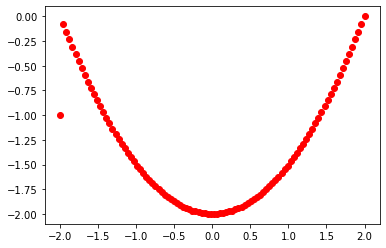

In [52]:
x = np.linspace(-2, 2, num=100)
y = x
y_int = scipy.integrate.cumulative_trapezoid(y, x,initial=-1) 
    # y=x 不定积分后为 y=0.5x**2-2，在[-2,2]区间里初始值为y(-2)=-1,
    #!! Remain Unknown why this
# print(y_int)
plt.plot(x, y_int, 'ro')
plt.show()

In [53]:
    # Composite Simpson formula: Integrate y(x) using samples along the given axis and the composite Simpson's rule.
x=np.linspace(0,1,21);y=f(x)
# print(x)
scipy.integrate.simpson(y,x,axis=-1)
    # If there are an even number of samples, N, then there are an odd number of intervals (N-1), but Simpson’s rule requires an even number of intervals. 
    # The parameter ‘even’ controls how this is handled.

3.141592652969785

In [54]:
def fun(x):
    return 4/(1+x**2)
#复合 Simpson 公式：与课本相同
def xps(a,b,n):   
    h=(b-a)/n
    x=a
    s=fun(x)-fun(b)
    for k in range(1,n+1):
        x=x+h/2
        s=s+4*fun(x)
        x=x+h/2
        s=s+2*fun(x)
    result=(h/6)*s
    return result
a=0
b=1
n=20
t=xps(a,b,n)
print(t)

3.1415926535801053


In [55]:
# Reason why different：计算公式不同
# 见 https://personal.math.ubc.ca/~pwalls/math-python/integration/simpsons-rule/
def simps(f,a,b,N=50):
    '''Approximate the integral of f(x) from a to b by Simpson's rule.

    Simpson's rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/3) \sum_{k=1}^{N/2} (f(x_{2i-2} + 4f(x_{2i-1}) + f(x_{2i}))
    where x_i = a + i*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : (even) integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using
        Simpson's rule with N subintervals of equal length.

    Examples
    --------
    >>> simps(lambda x : 3*x**2,0,1,10)
    1.0
    '''
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

simps(lambda x : 4/(1+x**2),0,1,20)

3.1415926529697846

### 3、Romberg Formula

In [56]:
    # Example: 验证《数值计算方法（MATLAB版）》Chapter 6.4 Example 6.13
f= lambda x:4/(1+x**2)
scipy.integrate.romberg(f,0,1,tol=1e-10) # ,show=True

3.141592653638244

## Chapter 5: Single Nonlinear Equation

https://scipy.github.io/devdocs/tutorial/optimize.html#root-finding

https://scipy.github.io/devdocs/reference/optimize.html#root-finding

`scipy.optimize.root_scalar`

In [57]:
import scipy.optimize

### 1、Bisection 二分法

`scipy.optimize.bisect`

In [58]:
# Example: 验证《数值计算方法（MATLAB版）》Chapter 4.2 Example 4.2
import math
def f(x):
    return (x - math.exp(-x))
root = scipy.optimize.bisect(f, 0, 1,xtol=1e-5,full_output=True)
root

(0.5671463012695312,
       converged: True
            flag: 'converged'
  function_calls: 19
      iterations: 17
            root: 0.5671463012695312)

In [59]:
    # Or: 
sol = scipy.optimize.root_scalar(f, bracket=[0, 1], method='bisect',xtol=1e-5)
sol.root, sol.iterations

(0.5671463012695312, 17)

In [60]:
# Homework 2.6
import scipy.optimize
import math
def f(x):
    return ((x**2-2*x+1)/(x**2-x-2))
sol = scipy.optimize.root_scalar(f, bracket=[0, 3], method='bisect',maxiter=12)
sol

      converged: False
           flag: 'convergence error'
 function_calls: 14
     iterations: 12
           root: 1.99951171875

D:\Program_Files\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


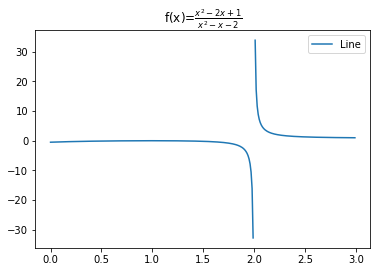

In [61]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(0,3,0.01);y=f(x)
plt.figure()
plt.plot(x, y)
plt.legend(['Line'])
plt.title(r'f(x)=$\frac{x^2-2x+1}{x^2-x-2}$')
plt.show()

### 2、Newton 牛顿法 & Secant 割线法

#### 1、Newton 牛顿法

In [62]:
# Example: 验证《数值计算方法（MATLAB版）》Chapter 4.4 Example 4.9
def f(x):
    return (x - math.exp(-x))
root = scipy.optimize.newton(f, x0=0.5, fprime=lambda x:1+math.exp(-x),tol=1e-5,full_output=True)
root

(0.5671432904097811,
       converged: True
            flag: 'converged'
  function_calls: 6
      iterations: 3
            root: 0.5671432904097811)

In [63]:
        # Or: 
sol = scipy.optimize.root_scalar(f, fprime=lambda x:1+math.exp(-x),bracket=[0, 1], method='newton',x0=0.5,xtol=1e-5)
sol.root, sol.iterations

(0.5671432904097811, 3)

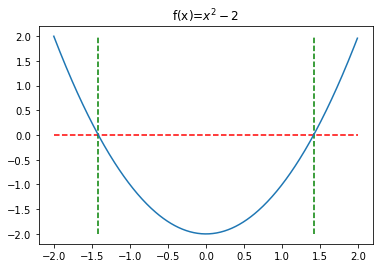

In [64]:
# Homework 2.7
import scipy.optimize
import math
def f(x):
    return (x**2-2)
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(-2,2,0.01);y=f(x)
plt.figure()
plt.plot(x, y)
plt.hlines(0,xmin=min(y),xmax=max(y),colors = "r", linestyles = "dashed")
plt.vlines(math.sqrt(2),ymin=min(x),ymax=max(x),colors = "g", linestyles = "dashed")
plt.vlines(-math.sqrt(2),ymin=min(x),ymax=max(x),colors = "g", linestyles = "dashed")
# plt.legend(['Line'])
plt.title(r'f(x)=$x^2-2$')
plt.show()

In [65]:
sol_right = scipy.optimize.root_scalar(f, fprime=lambda x:2*x,bracket=[0, 2], method='newton',xtol=1e-10,x0=0.5)
sol_left = scipy.optimize.root_scalar(f, fprime=lambda x:2*x,bracket=[-2, 0], method='newton',xtol=1e-10,x0=-0.5)
sol_right

      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 7
           root: 1.414213562373095

In [66]:
sol_left

      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 7
           root: -1.414213562373095

#### 2、Secant 割线法

In [67]:
# Example: 验证《数值计算方法（MATLAB版）》Chapter 4.4 Example 4.11
def f(x):
    return (math.exp(x)+x**2-2)
root = scipy.optimize.newton(f, x0=0.5,tol=1e-5,full_output=True)
root

(0.5372744491741065,
       converged: True
            flag: 'converged'
  function_calls: 5
      iterations: 4
            root: 0.5372744491741065)

In [68]:
# Homework 2 Bonus (3)
import scipy.optimize
import math
def f(x):
    return (x**3+4*x-5)
sol = scipy.optimize.root_scalar(f, fprime=lambda x:3*x**2+4, method='newton',xtol=1e-14,x0=10) 
sol

      converged: True
           flag: 'converged'
 function_calls: 19
     iterations: 9
           root: 1.0

In [69]:
# Homework 2 Bonus (4)
import scipy.optimize
import math
def f(x):
    return (x**3+4*x-5)
sol = scipy.optimize.root_scalar(f, method='secant',xtol=1e-14,x0=10,x1=-5) 
sol

      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 13
           root: 1.0

### 3、Fixed-Point Iteration 不动点迭代

`scipy.optimize.fixed_point`

如果是Aitken-Steffensen Formula加速迭代，那么可以设置参数`method='del2'`

In [70]:
# Example: 验证《数值计算方法（MATLAB版）》Chapter 4.2 Example 4.3
def func(x):
    return math.exp(-x)
scipy.optimize.fixed_point(func, x0=0.5,xtol=1e-05,method='iteration')

0.5671447236620769